<a href="https://colab.research.google.com/github/Fernandamarquees/Projeto-Heineken/blob/main/Explora%C3%A7%C3%A3o_e_An%C3%A1lise_de_dados_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Heineken**

Um projeto da Heineken com dados fictícios, elaborar um material que proporcione uma visão gerencial (macro) e operacional (mais detalhada com drilldown)para avaliar as metas e coberturas (vendas).

 - Avalie a performance das operações nesse indicador vs Meta e LY (Last Year)
 - Montar um dashboard, em excel, Looker Studio ou Power BI.

## Análise exploratória

In [ ]:
df.casea.to_csv('caseanalista.csv', sep=',', index=False)

In [ ]:
print(df.casea.iloc[6728:6740])

       Ano  Mês       Regional ID Cliente Fabrica Canal de Distribuição  \
6728  2023    2  DIR REG REMGO             220744               REVENDA   
6729  2023    2  DIR REG REMGO             220998               REVENDA   
6730  2023    2  DIR REG REMGO             220998               REVENDA   
6731  2023    2  DIR REG REMGO             220998               REVENDA   
6732  2023    2  DIR REG REMGO             220998               REVENDA   
6733  2023    2  DIR REG REMGO             220998               REVENDA   
6734  2023    2  DIR REG REMGO             220998               REVENDA   
6735  2023    2  DIR REG REMGO             220998               REVENDA   
6736  2023    2  DIR REG REMGO             220998               REVENDA   
6737  2023    2  DIR REG REMGO             220998               REVENDA   
6738  2023    2  DIR REG REMGO             220998               REVENDA   
6739  2023    2  DIR REG REMGO             220998               REVENDA   

     ID Cobertura    Met

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.context('seaborn')

In [ ]:
df = pd.DataFrame()

In [ ]:
df.casea = pd.read_csv ('BUSINESS CASE ANALISTA.csv')
df.casea.shape

<ipython-input-4-ba697ba81e2b>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df.casea = pd.read_csv ('BUSINESS CASE ANALISTA.csv')


(119667, 12)

In [ ]:
df.casea.head()

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,ID Canal de Distribuição,Diretoria,Regional.1,Data
0,2023,1,DIR REG REMGO,201481,REVENDA,1LR,0.0,2499.0,REV 1,REG B,ES,2023 01
1,2023,1,DIR REG REMGO,201481,REVENDA,300R,0.0,796.0,REV 1,REG B,ES,2023 01
2,2023,1,DIR REG REMGO,201481,REVENDA,600R,0.0,2960.0,REV 1,REG B,ES,2023 01
3,2023,1,DIR REG REMGO,201481,REVENDA,A15L,21.0,0.0,REV 1,REG B,ES,2023 01
4,2023,1,DIR REG REMGO,201481,REVENDA,A1R,1701.0,1891.0,REV 1,REG B,ES,2023 01


In [ ]:
df.casea.sample(10)

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,ID Canal de Distribuição,Diretoria,Regional.1,Data
107944,2024,10,DIR REG REMGO,CC0251,CDA,A600,658.0,925.0,CDA 2,REG A,MG,2024 10
113539,2024,11,DIR REG REMGO,CC0251,CDA,AMLN,479.0,318.0,CDA 2,REG A,MG,2024 11
19493,2023,5,DIR REG REMGO,204854,REVENDA,HKZL,703.0,689.0,REV 32,REG C,MG,2023 05
61962,2024,1,DIR REG REMGO,224335,REVENDA,HKZR,550.0,477.0,REV 30,REG C,MG,2024 01
77514,2024,5,DIR REG REMGO,201481,REVENDA,CPTT,79.0,106.0,REV 1,REG B,ES,2024 05
110564,2024,11,DIR REG REMGO,220612,REVENDA,HRLS,193.0,57.0,REV 23,REG C,MG,2024 11
98271,2024,9,DIR REG REMGO,204017,REVENDA,D473,0.0,1.0,REV 7,REG B,ES,2024 09
28775,2023,7,DIR REG REMGO,204854,REVENDA,ECON,439.0,324.0,REV 32,REG C,MG,2023 07
52961,2023,12,DIR REG REMGO,201487,REVENDA,GL60,71.0,66.0,REV 3,REG B,RJ,2023 12
119076,2024,12,DIR REG REMGO,220998,REVENDA,H600,1997.0,1709.0,REV 2,REG B,ES,2024 12


In [ ]:
df.casea['Mês'] = df.casea['Mês'].replace({'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12})
df.casea['Data'] = df.casea['Ano'].astype(str) + " " + df.casea['Mês'].astype(str)
# Converte coluna 'Data'  em datetime
df.casea['Data'] = pd.to_datetime(df.casea['Data'], format='%Y %m')
# strftime para retirar o dia 01
df.casea['Data'] = df.casea['Data'].dt.strftime('%Y %m')

<ipython-input-8-c54cac440d76>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.casea['Mês'] = df.casea['Mês'].replace({'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12})


In [ ]:
#Substituindo os valores nulos por zero
df.casea['Cobertura'].fillna(0, inplace=True)

<ipython-input-9-f74be5aa4310>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.casea['Cobertura'].fillna(0, inplace=True)


In [ ]:
("Valores ausentes depois do preenchimento:", df.casea["Cobertura"].isna().sum())

('Valores ausentes depois do preenchimento:', np.int64(0))

In [ ]:
#Substituindo os valores nulos por zero
df.casea['Meta'].fillna(0, inplace=True)

<ipython-input-10-3b3809fc560e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.casea['Meta'].fillna(0, inplace=True)


In [ ]:
#print("Valores ausentes antes do preenchimento:", df.casea.["ID Canal de Distribuição"].isna().sum())

# Criar um dicionário com os valores corretos
mapeamento = df.casea.groupby("ID Cliente Fabrica")["ID Canal de Distribuição"].first().to_dict()

# Preencher os valores ausentes usando o dicionário
df.casea["ID Canal de Distribuição"] = df.casea.apply(
    lambda row: mapeamento[row["ID Cliente Fabrica"]] if pd.isna(row["ID Canal de Distribuição"]) else row["ID Canal de Distribuição"],
    axis=1
)

# Verificar os valores ausentes após o preenchimento
#print("Valores ausentes depois do preenchimento:", df["ID Canal de Distribuição"].isna().sum())

In [ ]:
# Criar um dicionário com os valores corretos
mapeamento1 = df.casea.groupby("ID Cliente Fabrica")["Diretoria"].first().to_dict()

# Preencher os valores ausentes usando o dicionário
df.casea["Diretoria"] = df.casea.apply(
    lambda row: mapeamento1[row["ID Cliente Fabrica"]] if pd.isna(row["Diretoria"]) else row["Diretoria"],
    axis=1
)

In [ ]:
# Criar um dicionário com os valores corretos
mapeamento2 = df.casea.groupby("ID Cliente Fabrica")["Regional.1"].first().to_dict()

# Preencher os valores ausentes usando o dicionário
df.casea["Regional.1"] = df.casea.apply(
    lambda row: mapeamento2[row["ID Cliente Fabrica"]] if pd.isna(row["Regional.1"]) else row["Regional.1"],
    axis=1
)

In [ ]:
("Valores ausentes depois do preenchimento:", df.casea["Ano"].isna().sum())

('Valores ausentes depois do preenchimento:', np.int64(0))

In [ ]:
("Valores ausentes depois do preenchimento:", df.casea["Canal de Distribuição"].isna().sum())

('Valores ausentes depois do preenchimento:', np.int64(0))

In [ ]:
("Valores ausentes depois do preenchimento:", df.casea["ID Canal de Distribuição"].isna().sum())

('Valores ausentes depois do preenchimento:', np.int64(0))

In [ ]:
df.casea['Resultado'] = df.casea['Cobertura'] - df.casea['Meta']

In [ ]:
df.casea.groupby('ID Cliente Fabrica')['Cobertura'].max().unique()

array([ 6600.,  1755.,  5275.,  2024.,  2649.,  5603.,  4543.,  1906.,
        2939.,  1828.,  4243.,  1857.,  3243.,  1568.,  1774.,  3035.,
        3146.,  1355.,  2250.,   749.,   783.,   892.,  3545.,  2186.,
        1779.,  1423.,  1138.,  2881.,  2679.,   558.,  1243.,  1100.,
        1496.,   699.,  1745., 10175.,  4566.,  4029.,  8868.,  2112.])

In [ ]:
df.casea.groupby('ID Cliente Fabrica')['Cobertura'].min()

,Cobertura
ID Cliente Fabrica,
201481,0.0
201487,0.0
202266,0.0
202908,0.0
204017,0.0
204854,0.0
207603,0.0
207613,0.0
207627,0.0


In [ ]:
df.casea.groupby('Canal de Distribuição')['Cobertura'].sum()

,Cobertura
Canal de Distribuição,
CDA,23863982.0
REVENDA,47238163.0


In [ ]:
df.casea.groupby('Ano')['Meta'].sum()

,Meta
Ano,
2023,33239037.0
2024,37801133.0


In [ ]:
df.casea.groupby('Canal de Distribuição')['Meta'].sum()

,Meta
Canal de Distribuição,
CDA,23930110.0
REVENDA,47110060.0


In [ ]:
df.casea.groupby(['Ano', 'Canal de Distribuição'])['Meta'].sum()

Ano   Canal de Distribuição
2023  CDA                      11332555.0
      REVENDA                  21906482.0
2024  CDA                      12597555.0
      REVENDA                  25203578.0
Name: Meta, dtype: float64

In [ ]:
df.casea.groupby('Ano')[['Meta', 'Cobertura']].min()

,Meta,Cobertura
Ano,,
2023,0.0,0.0
2024,0.0,0.0


In [ ]:
df.casea.groupby('Ano')[['Meta', 'Cobertura']].max()

,Meta,Cobertura
Ano,,
2023,11331.0,10175.0
2024,12561.0,10066.0


In [ ]:
df.casea.groupby('Ano')[['Meta', 'Cobertura']].sum()

,Meta,Cobertura
Ano,,
2023,33239037.0,34313901.0
2024,37801133.0,36788244.0


In [ ]:
df.casea.groupby('Ano')[['Meta', 'Cobertura']].mean()

,Meta,Cobertura
Ano,,
2023,574.543014,593.122241
2024,611.530284,595.144207


In [ ]:
df.casea.groupby('Canal de Distribuição')['ID Cliente Fabrica'].nunique() #conta o número de valores únicos na coluna 'ID Cliente Fabrica' para cada grupo 'Canal de Distribuição'. Isso fornece o número de clientes distintos por canal de distribuição

,ID Cliente Fabrica
Canal de Distribuição,
CDA,8
REVENDA,32


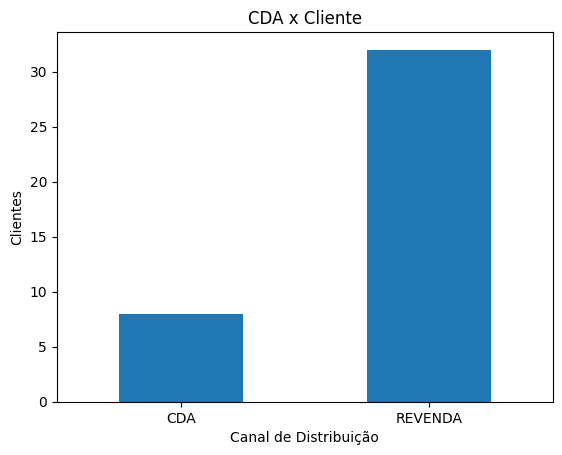

In [ ]:
df.casea.groupby('Canal de Distribuição')['ID Cliente Fabrica'].nunique().plot.bar(title="CDA x Cliente") #calcula o número
plt.xlabel('Canal de Distribuição')
plt.ylabel('Clientes')
plt.xticks(rotation='horizontal');

In [ ]:
df.casea['ID Cliente Fabrica'].unique() #lista de cliente

array(['201481', '201487', '202266', '202908', '204017', '204854',
       '207603', '207613', '207627', '208490', '208766', '217234',
       '219461', '220611', '220612', '220744', '220998', '221394',
       '221591', '221696', '221697', '221698', '221756', '223327',
       '223328', '223531', '223573', '223574', '223871', '224077',
       '224208', '224209', '224335', 'CC0185', 'CC0244', 'CC0247',
       'CC0251', 'CC0271', 'CC0272', 'CC0181'], dtype=object)

In [ ]:
df.casea.groupby('ID Cliente Fabrica')['Cobertura'].sum().sort_values(ascending=False)

,Cobertura
ID Cliente Fabrica,
CC0244,7245115.0
CC0271,5079555.0
201481,5000794.0
204854,3582269.0
202266,3446486.0
CC0247,3235304.0
207603,2838929.0
208766,2757910.0
CC0251,2407676.0


In [ ]:
#Agrupamento por produto
df['Produtos'] = df.casea.groupby('ID Cobertura')['Cobertura'].sum()

In [ ]:
#Agrupamento por produto
df.casea.groupby('ID Cobertura')['Cobertura'].sum()

,Cobertura
ID Cobertura,
1LR,299050.0
300R,10904.0
600R,1452539.0
A15L,209.0
A1R,225333.0
...,...
TRIC,302430.0
TRIV,346834.0
TSCH,2420931.0


In [ ]:
df.nlargest(10, 'Produtos') #filtrando os produtos mais vendidos nos dois anos

,Produtos
ID Cobertura,
TSCH,2420931.0
CTOT,2383541.0
FPPM,2308985.0
PMCR,2152338.0
CPRM,2146986.0
HKTT,2146705.0
HKRE,2113909.0
DESC,2023438.0
CLAT,1626120.0


In [ ]:
df.nsmallest(10, 'Produtos') #filtrando os produtos menos vendidos nos dois anos

,Produtos
ID Cobertura,
DREH,0.0
DTRT,0.0
I500,0.0
PRMA,0.0
CB30,1.0
K1R,3.0
EP26,7.0
DCP,10.0
EICH,31.0


In [ ]:
#Filtrando os clientes que compraram mais
df.casea.nlargest(10, 'Cobertura')

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,ID Canal de Distribuição,Diretoria,Regional.1,Data,Resultado
57301,2023,12,DIR REG REMGO,CC0244,CDA,TSCH,11331.0,10175.0,CDA 6,REG A,MG,2023 12,-1156.0
57234,2023,12,DIR REG REMGO,CC0244,CDA,CTOT,10917.0,10125.0,CDA 6,REG A,MG,2023 12,-792.0
113387,2024,11,DIR REG REMGO,CC0244,CDA,TSCH,9888.0,10066.0,CDA 6,REG A,MG,2024 11,178.0
52161,2023,11,DIR REG REMGO,CC0244,CDA,TSCH,11133.0,10042.0,CDA 6,REG A,MG,2023 11,-1091.0
57248,2023,12,DIR REG REMGO,CC0244,CDA,FPPM,9805.0,10042.0,CDA 6,REG A,MG,2023 12,237.0
52092,2023,11,DIR REG REMGO,CC0244,CDA,CTOT,10963.0,10005.0,CDA 6,REG A,MG,2023 11,-958.0
113319,2024,11,DIR REG REMGO,CC0244,CDA,CTOT,9619.0,9995.0,CDA 6,REG A,MG,2024 11,376.0
37133,2023,8,DIR REG REMGO,CC0244,CDA,TSCH,10478.0,9987.0,CDA 6,REG A,MG,2023 08,-491.0
107798,2024,10,DIR REG REMGO,CC0244,CDA,TSCH,9826.0,9987.0,CDA 6,REG A,MG,2024 10,161.0
37066,2023,8,DIR REG REMGO,CC0244,CDA,CTOT,10459.0,9951.0,CDA 6,REG A,MG,2023 08,-508.0


In [ ]:
df.casea.groupby('Canal de Distribuição')[['Meta', 'Cobertura']].sum()

,Meta,Cobertura
Canal de Distribuição,,
CDA,23930110.0,23863982.0
REVENDA,47110060.0,47238163.0


In [ ]:
#Filtrando os clientes que compraram menos
df.casea.sort_values('Cobertura', ascending=True).head(10)

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,ID Canal de Distribuição,Diretoria,Regional.1,Data,Resultado
55034,2023,12,DIR REG REMGO,221394,REVENDA,CDMC,2.0,0.0,REV 26,REG C,MG,2023 12,-2.0
47875,2023,11,DIR REG REMGO,202266,CDA,AD60,12.0,0.0,CDA 3,REG A,GO,2023 11,-12.0
47884,2023,11,DIR REG REMGO,202266,CDA,BBCH,2.0,0.0,CDA 3,REG A,GO,2023 11,-2.0
66133,2024,2,DIR REG REMGO,223574,REVENDA,AD60,12.0,0.0,REV 6,REG B,RJ,2024 02,-12.0
47843,2023,11,DIR REG REMGO,201487,REVENDA,HRLT,23.0,0.0,REV 3,REG B,RJ,2023 11,-23.0
47869,2023,11,DIR REG REMGO,202266,CDA,300R,4.0,0.0,CDA 3,REG A,GO,2023 11,-4.0
94174,2024,8,DIR REG REMGO,219461,REVENDA,TSG1,2.0,0.0,REV 31,REG C,MG,2024 08,-2.0
71660,2024,3,DIR REG REMGO,224335,REVENDA,ATOT,4.0,0.0,REV 30,REG C,MG,2024 03,-4.0
94215,2024,8,DIR REG REMGO,220611,REVENDA,CBMS,15.0,0.0,REV 25,REG C,MG,2024 08,-15.0
63120,2024,2,DIR REG REMGO,202908,REVENDA,ATOT,40.0,0.0,REV 14,REG C,MG,2024 02,-40.0


In [ ]:
#Filtrando os mais vendidos
df.casea.sort_values('Cobertura', ascending=False).head(10)

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,ID Canal de Distribuição,Diretoria,Regional.1,Data,Resultado
57301,2023,12,DIR REG REMGO,CC0244,CDA,TSCH,11331.0,10175.0,CDA 6,REG A,MG,2023 12,-1156.0
57234,2023,12,DIR REG REMGO,CC0244,CDA,CTOT,10917.0,10125.0,CDA 6,REG A,MG,2023 12,-792.0
113387,2024,11,DIR REG REMGO,CC0244,CDA,TSCH,9888.0,10066.0,CDA 6,REG A,MG,2024 11,178.0
57248,2023,12,DIR REG REMGO,CC0244,CDA,FPPM,9805.0,10042.0,CDA 6,REG A,MG,2023 12,237.0
52161,2023,11,DIR REG REMGO,CC0244,CDA,TSCH,11133.0,10042.0,CDA 6,REG A,MG,2023 11,-1091.0
52092,2023,11,DIR REG REMGO,CC0244,CDA,CTOT,10963.0,10005.0,CDA 6,REG A,MG,2023 11,-958.0
113319,2024,11,DIR REG REMGO,CC0244,CDA,CTOT,9619.0,9995.0,CDA 6,REG A,MG,2024 11,376.0
37133,2023,8,DIR REG REMGO,CC0244,CDA,TSCH,10478.0,9987.0,CDA 6,REG A,MG,2023 08,-491.0
107798,2024,10,DIR REG REMGO,CC0244,CDA,TSCH,9826.0,9987.0,CDA 6,REG A,MG,2024 10,161.0
37066,2023,8,DIR REG REMGO,CC0244,CDA,CTOT,10459.0,9951.0,CDA 6,REG A,MG,2023 08,-508.0


In [ ]:
df.casea.groupby('ID Cobertura')['Cobertura'].min()

,Cobertura
ID Cobertura,
1LR,0.0
300R,0.0
600R,295.0
A15L,0.0
A1R,0.0
...,...
TRIC,27.0
TRIV,0.0
TSCH,482.0


In [ ]:
df.casea.groupby('Canal de Distribuição')['Cobertura'].sum()

,Cobertura
Canal de Distribuição,
CDA,23863982.0
REVENDA,47238163.0


In [ ]:
df.casea.groupby('Canal de Distribuição')[['ID Cobertura', 'Cobertura']].min()

,ID Cobertura,Cobertura
Canal de Distribuição,,
CDA,1LR,0.0
REVENDA,1LR,0.0


In [ ]:
df.casea.groupby('ID Cobertura')['Cobertura'].max()

,Cobertura
ID Cobertura,
1LR,3230.0
300R,796.0
600R,7925.0
A15L,30.0
A1R,3082.0
...,...
TRIC,2377.0
TRIV,4948.0
TSCH,10175.0


In [ ]:
df.casea.dtypes

,0
Ano,int64
Mês,int64
Regional,object
ID Cliente Fabrica,object
Canal de Distribuição,object
ID Cobertura,object
Meta,float64
Cobertura,float64
ID Canal de Distribuição,object
Diretoria,object


In [ ]:
df.apoio2.to_csv('apoio2.csv', sep=',', index=False)

In [ ]:
df.apoio2 = pd.read_csv ('BUSINESS APOIO 2.csv')
df.apoio2.shape

<ipython-input-13-1eb7083c45eb>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.apoio2 = pd.read_csv ('BUSINESS APOIO 2.csv')


(40, 5)

In [ ]:
df.apoio2.head()

,ID Cliente Fabrica,DIRETORIA,REGIONAL,OPERAÇÃO,IDENTIFICAÇÃO
0,201481,REG B,ES,REV,1
1,201487,REG B,RJ,REV,3
2,202266,REG A,GO,CDA,3
3,202908,REG C,MG,REV,14
4,204017,REG B,ES,REV,7


In [ ]:
df.apoio2.groupby('REGIONAL')['DIRETORIA'].nunique()

,DIRETORIA
REGIONAL,
ES,1
GO,1
MG,2
RJ,1


In [ ]:
df.apoio1.to_csv('apoio1.csv', sep=',', index=False)

In [ ]:
df.apoio1 = pd.read_csv ('BUSINESS APOIO 1.csv')
df.apoio1.shape

(221, 7)

In [ ]:
df.caseanalista = pd.concat([df.casea, df.apoio2], ignore_index=True)

In [ ]:
df.caseanalista.sample(20)

,Ano,Mês,Regional,ID Cliente Fabrica,Canal de Distribuição,ID Cobertura,Meta,Cobertura,DIRETORIA,REGIONAL,OPERAÇÃO,IDENTIFICAÇÃO
44679,2023.0,Out,DIR REG REMGO,220998,REVENDA,HZLN,583.0,508.0,NaN,NaN,NaN,NaN
25233,2023.0,Jun,DIR REG REMGO,220612,REVENDA,FYST,NaN,2.0,NaN,NaN,NaN,NaN
95923,2024.0,Ago,DIR REG REMGO,223573,REVENDA,AMVL,21.0,1.0,NaN,NaN,NaN,NaN
108851,2024.0,Nov,DIR REG REMGO,202908,REVENDA,BAMT,13.0,19.0,NaN,NaN,NaN,NaN
17382,2023.0,Abr,DIR REG REMGO,223574,REVENDA,CBIM,573.0,596.0,NaN,NaN,NaN,NaN
76279,2024.0,Abr,DIR REG REMGO,224077,REVENDA,H6R,293.0,328.0,NaN,NaN,NaN,NaN
53728,2023.0,Dez,DIR REG REMGO,207613,REVENDA,DESC,1626.0,1619.0,NaN,NaN,NaN,NaN
4571,2023.0,Jan,DIR REG REMGO,CC0271,CDA,CBAD,302.0,346.0,NaN,NaN,NaN,NaN
11728,2023.0,Mar,DIR REG REMGO,221591,REVENDA,TSCH,2030.0,2014.0,NaN,NaN,NaN,NaN
109124,2024.0,Nov,DIR REG REMGO,204017,REVENDA,TRIC,497.0,581.0,NaN,NaN,NaN,NaN


In [ ]:
df.apoio1.head()

,ID Cobertura,Agregador,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1LR,CERV 1L RGB,NaN,NaN,NaN,NaN,NaN
1,300R,CERV 300ML RGB,NaN,NaN,NaN,NaN,NaN
2,600R,CERV 600ML RGB,NaN,NaN,NaN,NaN,NaN
3,A15L,AGUA,"1,5L",NaN,NaN,NaN,NaN
4,A1R,AMSTEL,1L RGB,NaN,NaN,NaN,NaN


In [ ]:
df.apoio1.groupby('ID Cobertura')['Agregador'].unique()

,Agregador
ID Cobertura,
1LR,[CERV 1L RGB]
300R,[CERV 300ML RGB]
600R,[CERV 600ML RGB]
A15L,[AGUA]
A1R,[AMSTEL]
...,...
TRIC,[TRIMARCA]
TRIV,[CERV TRIVIDRO RGB]
TSCH,[COBERTURA TOTAL]


## Conclusão

São 40 cliente ao todo, sendo 32 clientes de pontos de Revenda e 8 clientes de CDAs.


Distribuídos: 24 em Minas Gerais, 10 no Rio de Janeiro, 4 no Espírito Santo e 2 em Goiás.


Apesar de haver 4x mais pontos de revenda do que CDAs, a meta da CDAs era 23.930.110 reais e a cobertura foi 23.863.982 reais, enquanto dos pontos de Revenda a meta era 47.110.060 reais e a cobertura foi 47.238.163 reais.

**Os clientes que mais compraram:**
CC0244

**Os clientes que menos compraram:**
219461
223871

**Os itens mais vendidos foram:**

TSCH    2420931.0

CTOT    2383541.0

FPPM    2308985.0

PMCR    2152338.0

CPRM    2146986.0

HKTT    2146705.0

HKRE    2113909.0

DESC    2023438.0

CLAT    1626120.0

CRED    1624155.0

**Os menos vendidos foram:**

DREH    0.0

DTRT    0.0

I500    0.0

PRMA    0.0

CB30    1.0

K1R 3.0

EP26    7.0

DCP 10.0

EICH    31.0

EPCP    31.0

**Visualize os dados e  a performance das operações no Dashboard interativo**

https://acesse.one/Dashboard-interativo